In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
X,y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                         n_classes=2, n_clusters_per_class=1,random_state=38,hypercube=False,class_sep=5)

In [2]:
def scatter(X,y):
    plt.figure(figsize=(10,6))
    plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

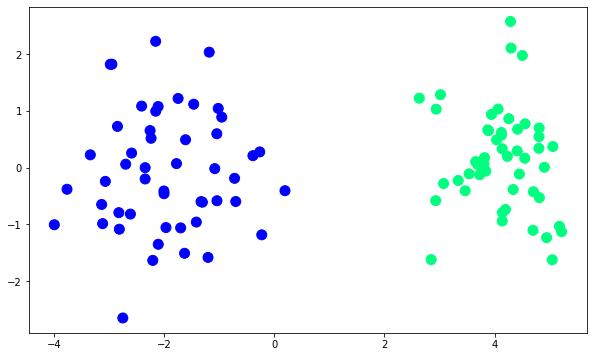

In [3]:
scatter(X,y)

In [4]:
# predictor func
def generator(X,W):
    c = np.dot(W.T,X)
    if c >= 0:
        c = 1
    if c< 0:
        c= 0
    return c

In [5]:
X_new = np.insert(X,0,1,axis=1)

In [6]:
## Algorithm
epoch = 3000
eta = 0.1
W = np.ones(X_new[0].shape)
for i in range(epoch):
    idx = np.random.randint(0,y.shape[0])
    sample = X_new[idx]
    pred =generator(sample,W)
    W = W + eta*(y[idx] - pred)*sample 

slope = -(W[1]/W[2])
intecp = - W[0]/W[2]

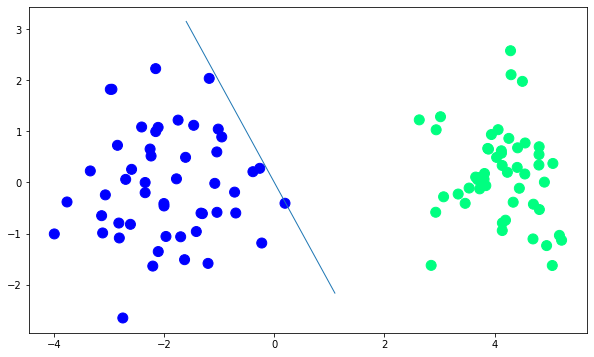

In [7]:
x_in = np.linspace(-1.6,1.1,100)
y_in = slope*x_in + intecp
plt.figure(figsize=(10,6))
plt.scatter(X_new[:,1],X_new[:,2],c=y,cmap='winter',s=100)
plt.plot(x_in,y_in,linewidth=1)  

### With Logistic Regression Sklearn

In [8]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
model = LR.fit(X,y)
Y_pred = LR.predict(X)

In [9]:
w = model.coef_
c = model.intercept_
m = -(w[0,0]/w[0,1])
c = - c[0]/w[0,1]
print('slope=', m)
print('intercept=',c)

slope= -16.974849182195157
intercept= 21.371585019951397


(-3.0, 3.0)

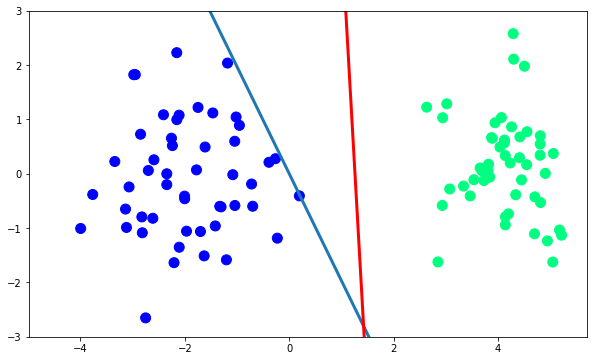

In [10]:
x_in = np.linspace(-4.5,5,100)
y_in = slope*x_in + intecp
y_inlor = m*x_in + c
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.plot(x_in,y_in,linewidth=3)
plt.plot(x_in,y_inlor,linewidth=3,color = 'red')
plt.ylim(-3,3)

We now see the limitation of perceptron trick (blue line), it may do the job of separating the clases but it will not seach for the best separtor, as soon as it is able to separate all points it stops, however sklearn LOg reg not only separates the clases but tries to find th best model to do so(red line).

### Using the Sigmoid Function

In [11]:
## Sigmoid function:
def sigmoid(X,W):
    Z = np.dot(W.T,X)
    y_hat = 1/(1+np.exp(-Z))
    return y_hat

In [12]:
X_new = np.insert(X,0,1,axis=1)

In [23]:
epoch = 3000
eta = 0.1
W = np.ones(X_new[0].shape)
for i in range(epoch):
    idx = np.random.randint(0,y.shape[0])
    sample = X_new[idx]
    y_hat =sigmoid(sample,W)
    W = W + eta*(y[idx] - y_hat)*sample 

slope_sig = -(W[1]/W[2])
intecp_sig = - W[0]/W[2]

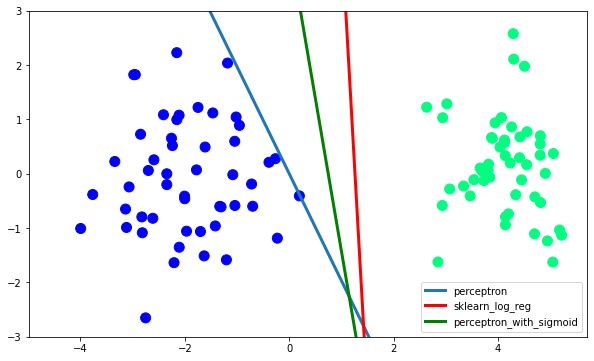

In [20]:
x_in = np.linspace(-4.5,5,100)
y_in = slope*x_in + intecp
y_inlor = m*x_in + c
y_in_sig = slope_sig*x_in + intecp_sig
plt.figure(figsize=(10,6))
plt.scatter(X_new[:,1],X_new[:,2],c=y,cmap='winter',s=100)
plt.plot(x_in,y_in,linewidth=3,label = 'perceptron')
plt.plot(x_in,y_inlor,linewidth=3,color = 'red', label= 'sklearn_log_reg')
plt.plot(x_in,y_in_sig,linewidth=3,color = 'green', label = 'perceptron_with_sigmoid')
plt.ylim(-3,3)
plt.legend()

### We see that the implementation of sigmoid has improved our model but still sklearn model is better than ours.